<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/CV_Task1_Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
cd /content/gdrive/My Drive/Computer_Vision

/content/gdrive/My Drive/Computer_Vision


In [0]:
import argparse
import copy
import os

import cv2
import numpy as np

import utils



# Prewitt operator
prewitt_x = [[1, 0, -1]] * 3
prewitt_y = [[1] * 3, [0] * 3, [-1] * 3]

# Sobel operator
sobel_x = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
sobel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]


def parse_args():
    parser = argparse.ArgumentParser(description="cse 473/573 project 1.")
    parser.add_argument(
        "--img_path", type=str, default="",
        help="path to the image used for edge detection")
    parser.add_argument(
        "--kernel", type=str, default="sobel",
        choices=["prewitt", "sobel", "Prewitt", "Sobel"],
        help="type of edge detector used for edge detection")
    parser.add_argument(
        "--result_saving_directory", dest="rs_directory", type=str, default="./results/",
        help="directory to which results are saved (do not change this arg)")
    args = parser.parse_args()
    return args


def read_image(img_path, show=False):
    """Reads an image into memory as a grayscale array.
    """
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if not img.dtype == np.uint8:
        pass

    if show:
        show_image(img)

    img = [list(row) for row in img]
    return img

def show_image(img, delay=1000):
    """Shows an image.
    """
    cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('image', img)
    cv2.waitKey(delay)
    cv2.destroyAllWindows()

def write_image(img, img_saving_path):
    """Writes an image to a given path.
    """
    if isinstance(img, list):
        img = np.asarray(img, dtype=np.uint8)
    elif isinstance(img, np.ndarray):
        if not img.dtype == np.uint8:
            assert np.max(img) <= 1, "Maximum pixel value {:.3f} is greater than 1".format(np.max(img))
            img = (255 * img).astype(np.uint8)
    else:
        raise TypeError("img is neither a list nor a ndarray.")

In [0]:
def convolve2d(img, kernel):
    """Convolves a given image and a given kernel.
    Steps:
        (1) flips the either the img or the kernel.
        (2) pads the img or the flipped img.
            this step handles pixels along the border of the img,
            and makes sure that the output img is of the same size as the input image.
        (3) applies the flipped kernel to the image or the kernel to the flipped image,
            using nested for loop.
    Args:
        img: nested list (int), image.
        kernel: nested list (int), kernel.
    Returns:
        img_conv: nested list (int), image.
    """
    # TODO: implement this function.
    ker=copy.deepcopy(kernel)
    s=len(ker)
    rev_ker=[ker[s-1-i] for i in range(s)]
    for i in range(s):
      rev_ker[i]=[rev_ker[i][s-1-j] for j in range(s)]
    # print(rev_ker)

    pre_padded_img = copy.deepcopy(img)
    l=len(pre_padded_img)
    b=len(pre_padded_img[0])
    # img_conv=[[0]*b]*l
    img_conv=np.zeros((l, b)).tolist()
    



    pad_size=int((len(kernel)-1)/2)
    # print(pre_padded_img)
    padded_img=utils.zero_pad(pre_padded_img,pad_size,pad_size)
    # print(padded_img)
    
    for i in range(l):
      for j in range(b):
        for m in range(s):
          for n in range(s):
            img_conv[i][j]=img_conv[i][j]+(padded_img[i+m][j+n]*rev_ker[m][n])
        
        # img_conv[i][j]= int(np.multiply(np.array([k[j:j+len(rev_ker)] for k in padded_img[i:i+len(kernel)]]),np.array(rev_ker)).sum())
    # raise NotImplementedError
    return img_conv

In [220]:
A=[[7,21,4,5,21,4],
   [7,231,33,5,21,4],
   [7,21,4,52,21,4],
   [7,21,4,115,21,4],
   [7,21,4,225,21,4],
   [7,21,142,5,21,4]]   
convolve2d(A, [[-1,0,1],[-1,0,1],[-1,0,1]])

[[-252.0, -23.0, 242.0, -5.0, 2.0, 42.0],
 [-273.0, -20.0, 211.0, -22.0, 50.0, 63.0],
 [-273.0, -20.0, 101.0, -22.0, 160.0, 63.0],
 [-63.0, 9.0, -329.0, -51.0, 380.0, 63.0],
 [-63.0, -129.0, -282.0, 87.0, 333.0, 63.0],
 [-42.0, -132.0, -188.0, 104.0, 222.0, 42.0]]

In [0]:
def normalize(img):
    """Normalizes a given image.

    Hints:
        Noralize a given image using the following equation:

        normalized_img = frac{img - min(img)}{max(img) - min(img)},

        so that the maximum pixel value is 255 and the minimum pixel value is 0.

    Args:
        img: nested list (int), image.

    Returns:
        normalized_img: nested list (int), normalized image.
    """
    # TODO: implement this function.
    import numpy as np
    img_np=np.array(img)
    img_np=(img_np-img_np.min())/(img_np.max()-img_np.min())
    img_np=img_np.astype(int)
    img=img_np.tolist()

    # raise NotImplementedError
    return img

In [0]:
def detect_edges(img, kernel, norm=True):
    """Detects edges using a given kernel.

    Args:
        img: nested list (int), image.
        kernel: nested list (int), kernel used to detect edges.
        norm (bool): whether to normalize the image or not.

    Returns:
        img_edge: nested list (int), image containing detected edges.
    """
    # TODO: detect edges using convolve2d and normalize the image containing detected edges using normalize.
    # raise NotImplementedError
    img_edges=convolve2d(img, kernel)
    if norm:
      img_edges=normalize(img)
    return img_edges


In [0]:
def edge_magnitude(edge_x, edge_y):
    """Calculate magnitude of edges by combining edges along two orthogonal directions.

    Hints:
        Combine edges along two orthogonal directions using the following equation:

        edge_mag = sqrt(edge_x ** 2 + edge_y **).

        Make sure that you normalize the edge_mag, so that the maximum pixel value is 1.

    Args:
        edge_x: nested list (int), image containing detected edges along one direction.
        edge_y: nested list (int), image containing detected edges along another direction.

    Returns:
        edge_mag: nested list (int), image containing magnitude of detected edges.
    """
    # TODO: implement this function.
    # raise NotImplementedError
    import numpy as np
    x=np.array(edge_x)
    y=np.array(edge_y)
    edge_mag=np.sqrt(np.add(np.square(x),np.square(y)))
    return edge_mag

In [44]:
def main():
    args = parse_args()

    img = read_image(args.img_path)
    # path='/content/gdrive/My Drive/Computer_Vision/proj1-task1.jpg'
    img=read_image(path)

    if args.kernel in ["prewitt", "Prewitt"]:
        kernel_x = prewitt_x
        kernel_y = prewitt_y
    elif args.kernel in ["sobel", "Sobel"]:
        kernel_x = sobel_x
        kernel_y = sobel_y
    else:
        raise ValueError("Kernel type not recognized.")

    if not os.path.exists(args.rs_directory):
        os.makedirs(args.rs_directory)

    img_edge_x = detect_edges(img, kernel_x, False)
    img_edge_x = np.asarray(img_edge_x)
    write_image(normalize(img_edge_x), os.path.join(args.rs_directory, "{}_edge_x.jpg".format(args.kernel.lower())))

    img_edge_y = detect_edges(img, kernel_y, False)
    img_edge_y = np.asarray(img_edge_y)
    write_image(normalize(img_edge_y), os.path.join(args.rs_directory, "{}_edge_y.jpg".format(args.kernel.lower())))

    img_edges = edge_magnitude(img_edge_x, img_edge_y)
    write_image(img_edges, os.path.join(args.rs_directory, "{}_edge_mag.jpg".format(args.kernel.lower())))


if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] [--img_path IMG_PATH]
                             [--kernel {prewitt,sobel,Prewitt,Sobel}]
                             [--result_saving_directory RS_DIRECTORY]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-c5f0adea-fe28-4275-a167-ccdfefa6754b.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


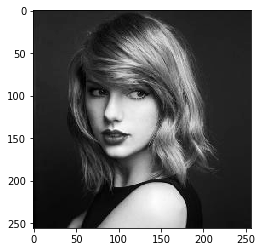

In [221]:
# plotting the raw image
img_path='proj1-task1.jpg'
img=read_image(img_path)

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img, cmap="gray")
plt.show()





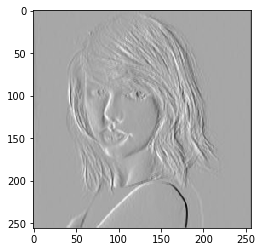

In [222]:
kernel_x=prewitt_x
img_edge_x = detect_edges(img, kernel_x, False)

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img_edge_x, cmap="gray")
plt.show()



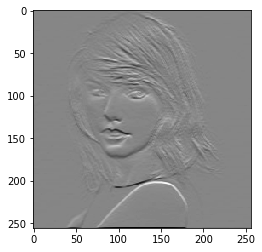

In [223]:
kernel_x=prewitt_y
img_edge_x = detect_edges(img, kernel_x, False)

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img_edge_x, cmap="gray")
plt.show()



In [224]:
A=[[7,21,4,5,21,4],
   [7,21,4,5,21,4],
   [7,21,4,5,21,4],
   [7,21,4,5,21,4],
   [7,21,4,5,21,4],
   [7,21,4,5,21,4]]   
convolve2d(A, [[-1,0,1],[-1,0,1],[-1,0,1]])

[[-42.0, 6.0, 32.0, -34.0, 2.0, 42.0],
 [-63.0, 9.0, 48.0, -51.0, 3.0, 63.0],
 [-63.0, 9.0, 48.0, -51.0, 3.0, 63.0],
 [-63.0, 9.0, 48.0, -51.0, 3.0, 63.0],
 [-63.0, 9.0, 48.0, -51.0, 3.0, 63.0],
 [-42.0, 6.0, 32.0, -34.0, 2.0, 42.0]]

[[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]